## MALARIA DISEASE DETECTION USING TRANSFER LEARNING AND CNN

In [1]:
# import essential libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Train'
valid_path = 'Test'

In [3]:
# Import the Vgg19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('Train/*')
folders

['Train\\Parasite', 'Train\\Uninfected']

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from tensorflow.keras.layers import MaxPooling2D

In [10]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [11]:
#cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [15]:
import scipy
from scipy import ndimage

In [16]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Bisma Bashir\AppData\Local\Temp\ipykernel_6072\2033252562.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
13/13 [==============================] - 52s 3s/step - loss: 2.9634 - accuracy: 0.4856 - val_loss: 1.1745 - val_accuracy: 0.3806
Epoch 2/10
13/13 [==============================] - 23s 2s/step - loss: 0.7216 - accuracy: 0.5481 - val_loss: 0.7119 - val_accuracy: 0.4254
Epoch 3/10
13/13 [==============================] - 21s 2s/step - loss: 0.6777 - accuracy: 0.5553 - val_loss: 0.6782 - val_accuracy: 0.5075
Epoch 4/10
13/13 [==============================] - 21s 2s/step - loss: 0.6590 - accuracy: 0.6058 - val_loss: 0.6402 - val_accuracy: 0.6791
Epoch 5/10
13/13 [==============================] - 24s 2s/step - loss: 0.6698 - accuracy: 0.6082 - val_loss: 0.6529 - val_accuracy: 0.6269
Epoch 6/10
13/13 [==============================] - 28s 2s/step - loss: 0.6590 - accuracy: 0.5986 - val_loss: 0.6341 - val_accuracy: 0.6791
Epoch 7/10
13/13 [==============================] - 22s 2s/step - loss: 0.5925 - accuracy: 0.6635 - val_loss: 0.9216 - val_accuracy: 0.4701
Epoch 8/10
13/13 [==

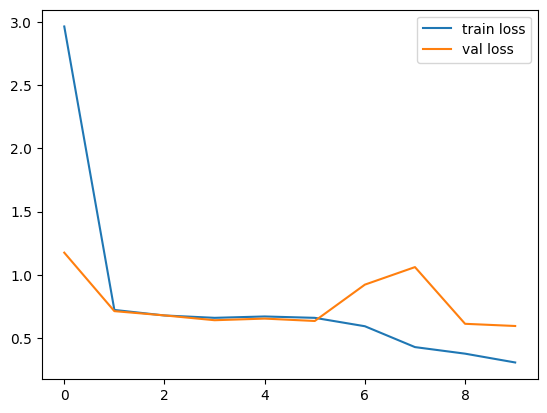

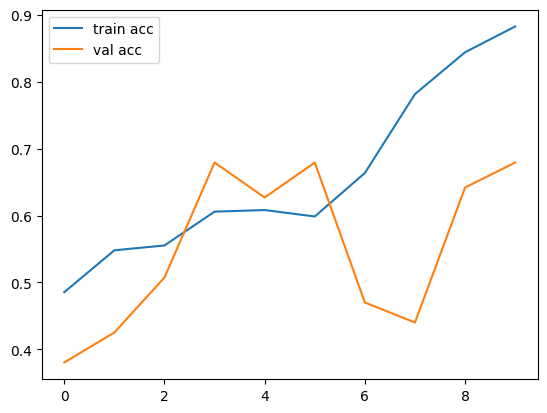

<Figure size 640x480 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a M5 file
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

d:\ANACONDA FILES\PROJECTS\Malaria detection\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
y_pred=model.predict(test_set)

5/5 [==============================] - 1s 181ms/step


In [20]:
y_pred

array([[0.36527807, 0.63472193],
       [0.16410024, 0.8358998 ],
       [0.38426256, 0.6157375 ],
       [0.26333803, 0.7366619 ],
       [0.9696311 , 0.0303689 ],
       [0.5349425 , 0.4650575 ],
       [0.20460437, 0.7953956 ],
       [0.5169534 , 0.48304662],
       [0.8153482 , 0.18465179],
       [0.6246923 , 0.37530777],
       [0.6398368 , 0.3601632 ],
       [0.9380201 , 0.06197992],
       [0.1948643 , 0.80513567],
       [0.8264232 , 0.17357677],
       [0.26836392, 0.7316361 ],
       [0.23026977, 0.76973027],
       [0.17008634, 0.8299137 ],
       [0.7090178 , 0.29098222],
       [0.7298471 , 0.27015293],
       [0.71914405, 0.280856  ],
       [0.6590776 , 0.3409224 ],
       [0.20104858, 0.79895145],
       [0.1711086 , 0.8288914 ],
       [0.19110309, 0.8088969 ],
       [0.83127624, 0.16872375],
       [0.1836434 , 0.8163566 ],
       [0.4321851 , 0.56781495],
       [0.36676577, 0.6332342 ],
       [0.47809345, 0.5219066 ],
       [0.65036666, 0.34963334],
       [0.

In [21]:
## getting the index of higher values from y_pred to check from which class it belongs to.ie;(0:infected,1:not infected)
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1], dtype=int64)

## Reading the image and doing the predictions from the model

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_vgg19.h5')

In [25]:
img=image.load_img('Test/Uninfected/10.png',target_size=(224,224))

In [26]:
img=image.load_img('Train/parasite/30.png',target_size=(224,224))

In [27]:
## convert the image into array
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [28]:
x.shape

(224, 224, 3)

In [29]:
## rescaling the data
x=x/255

In [30]:
## expanding the dimensions
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

1/1 [==============================] - 0s 411ms/step


array([[1., 0.]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 30ms/step


In [33]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
